In [14]:
#goal, predict with categorical data if somebody with make > 100k
#https://www.youtube.com/watch?v=ZVR2Way4nwQ to understand
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

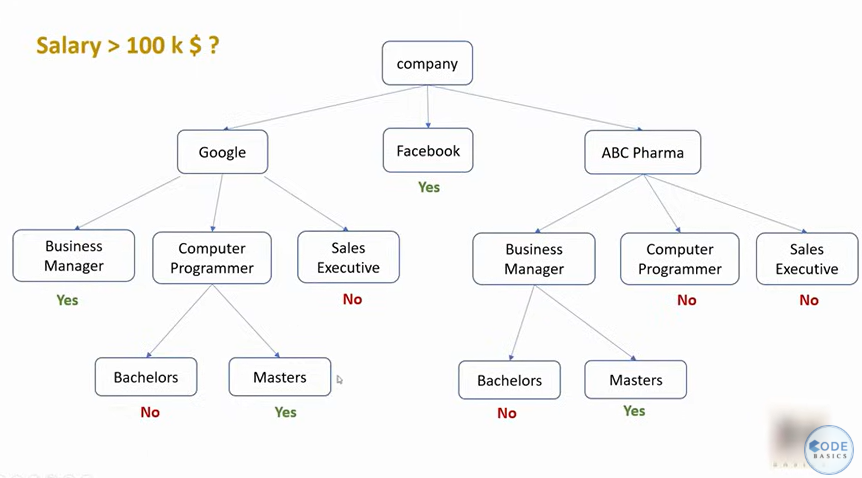

In [1]:
from IPython.display import Image
Image(filename='rfg.png')  #style of how random forest regression works splitting data into groups

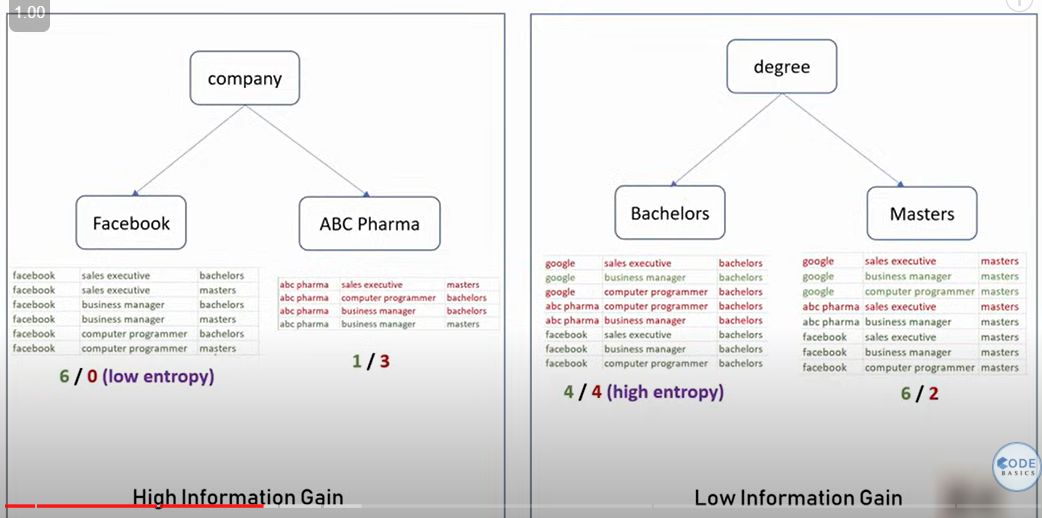

In [68]:
Image(filename='info.png') 
#what is a better split? better entropy (meaning less randomized/mixed (left one))
###basically this ML algo will find the lowest entropy cuts for classification

In [5]:
df = pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [6]:
inputs = df.drop('salary_more_then_100k', axis='columns')
target = df['salary_more_then_100k']
inputs #dividing to inputs and outputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [7]:
le_company = LabelEncoder() #convert all of these to number [0, 1, 2]
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [8]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [11]:
#now all encoded as numbers

inputs_n = inputs.drop(['company', 'job', 'degree'], axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [16]:
model = DecisionTreeClassifier()

In [17]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [19]:
model.score(inputs_n, target)

1.0

In [20]:
model.predict([[2, 2, 1]]) #google, sales executive, masters is predicted < 100k

C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [21]:
model.predict([[2, 0, 1]]) #google, sales manager, masters is predicted < 100k

C:\Users\wayla\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [39]:
#Exercise for Decision Tree

#1. Now do some exploratory data analysis to figure out which variables have direct and clear impact
#2. Take away or make dummy vars for all nans
#3. Binary/One Hot Encoding
#4. Data Visualization if needed
#5. Now build  model using variables that were narrowed down in step 1
#6. Measure the accuracy of the model

df2 = pd.read_csv('titanic.csv')
#getting rid of useless data to do with survivor rate
df2 = df2.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch', 'Embarked', 'Cabin'], axis='columns')
df2

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [48]:
df2.isnull().sum() #there are some nulls

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [50]:
#patching nulls with dummy values
df2 = df2.fillna(df2.Age.mean())
df2

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.000000,7.2500
1,1,1,female,38.000000,71.2833
2,1,3,female,26.000000,7.9250
3,1,1,female,35.000000,53.1000
4,0,3,male,35.000000,8.0500
...,...,...,...,...,...
886,0,2,male,27.000000,13.0000
887,1,1,female,19.000000,30.0000
888,0,3,female,29.699118,23.4500
889,1,1,male,26.000000,30.0000


In [53]:
#input and output dfs
X = df2.drop(['Survived'], axis='columns')
y = df2.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [59]:
#replac male and female with label encoders
gender_le = LabelEncoder()
X['sex_le'] = gender_le.fit_transform(X.Sex)
X = X.drop('Sex', axis='columns')
X

,Pclass,Age,Fare,sex_le
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [60]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,Pclass,Age,Fare,sex_le
563,3,29.699118,8.0500,1
467,1,56.000000,26.5500,1
756,3,28.000000,7.7958,1
310,1,24.000000,83.1583,0
485,3,29.699118,25.4667,0
...,...,...,...,...
579,3,32.000000,7.9250,1
6,1,54.000000,51.8625,1
304,3,29.699118,8.0500,1
576,2,34.000000,13.0000,0


In [62]:
#Start of ML

model2 = DecisionTreeClassifier()

In [63]:
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
#predicting survival rate based on Decision Tree classification
model2.score(X_test, y_test)

0.7206703910614525

In [65]:
model3 = LogisticRegression()

In [66]:
model3.fit(X_train, y_train)

LogisticRegression()

In [67]:
#predicting survival rate based on Logistic Regression
model3.score(X_test, y_test)

0.8044692737430168

In [ ]:
#we can conclude that the Logistic Regression is better at testing survivors than Decision Tree